# Clustering Customer Group 


**Unsupervised Machine Learning Project**

**Day created** : 30/02/2024 

---

## Project goal
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
The goal of this project is to dive into customer consumption behavior and understand different customer group in order to improve the large super market chain marketing strategies. Instead of focusing on one major campaign, the strategies will be customized based on different group of customer.

The data record of this super market contains the demographic of 2000 customers that has been collected through loyalty cards. The cards tracks when customers use it at checkout, and includes variables such as customer age, gender, annual income, etc. 

### Table of contents:

1. **Introduction** 
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis**
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation**
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters using methods discussed in lectures
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** 
    - Suggestions regarding marketing techniques based on different clusters of customers 
5. **Conclusion** 


<hr style="width:35%;margin-left:0;"> 

# Introduction

In the fast-pace consumer good industry, it is highly important for Supermarkets to understand the consumer's behaviour. Having more data and insights will create more understanding for to create smarter marketing strategies to create competitive advantages for the business. As there is no-one-side-fits-all strategies, it is better to apply target marketing to satifiy the needs of the comsumers based on their charateristics. 

The data will contain 7 features including: 
 - Sex
 - Marital status
 - Age
 - Education
 - Income 
 - Occupation
 - Settlement Size 
 
From the unlabeled data about the customer’s information, the data set looks like there is only a little or no information that we can gain from this data set.

With the right application of clustering, the supermarket can divide the optimal customer groups based on age, income, and marital status. In this report, there are 2 different cluster methods will be included which are **K-means and K-prototypes**. 

From the best cluster results, each customer group’s details will be valuable information.Customizing marketing campaigns for different customer segments will be a helpful base to fit their different needs and purchasing habits. It is important to find a suitable cluster in order to find the correct segmentation of buyers.


# Data Exploratory
- Explore data type for each column

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Import data and drop ID Column
df = pd.read_csv('data/data.csv')
table = df.drop(['ID'], axis='columns')
df_new = df.drop(['ID'], axis='columns')
df_new.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


From the table above we can there are two types of categorical variable:
- Categorical variable: Age, Income
- Numerical variable: Sex, Marital status, Education, Occupation, Settlement size

## Catergorical Variable

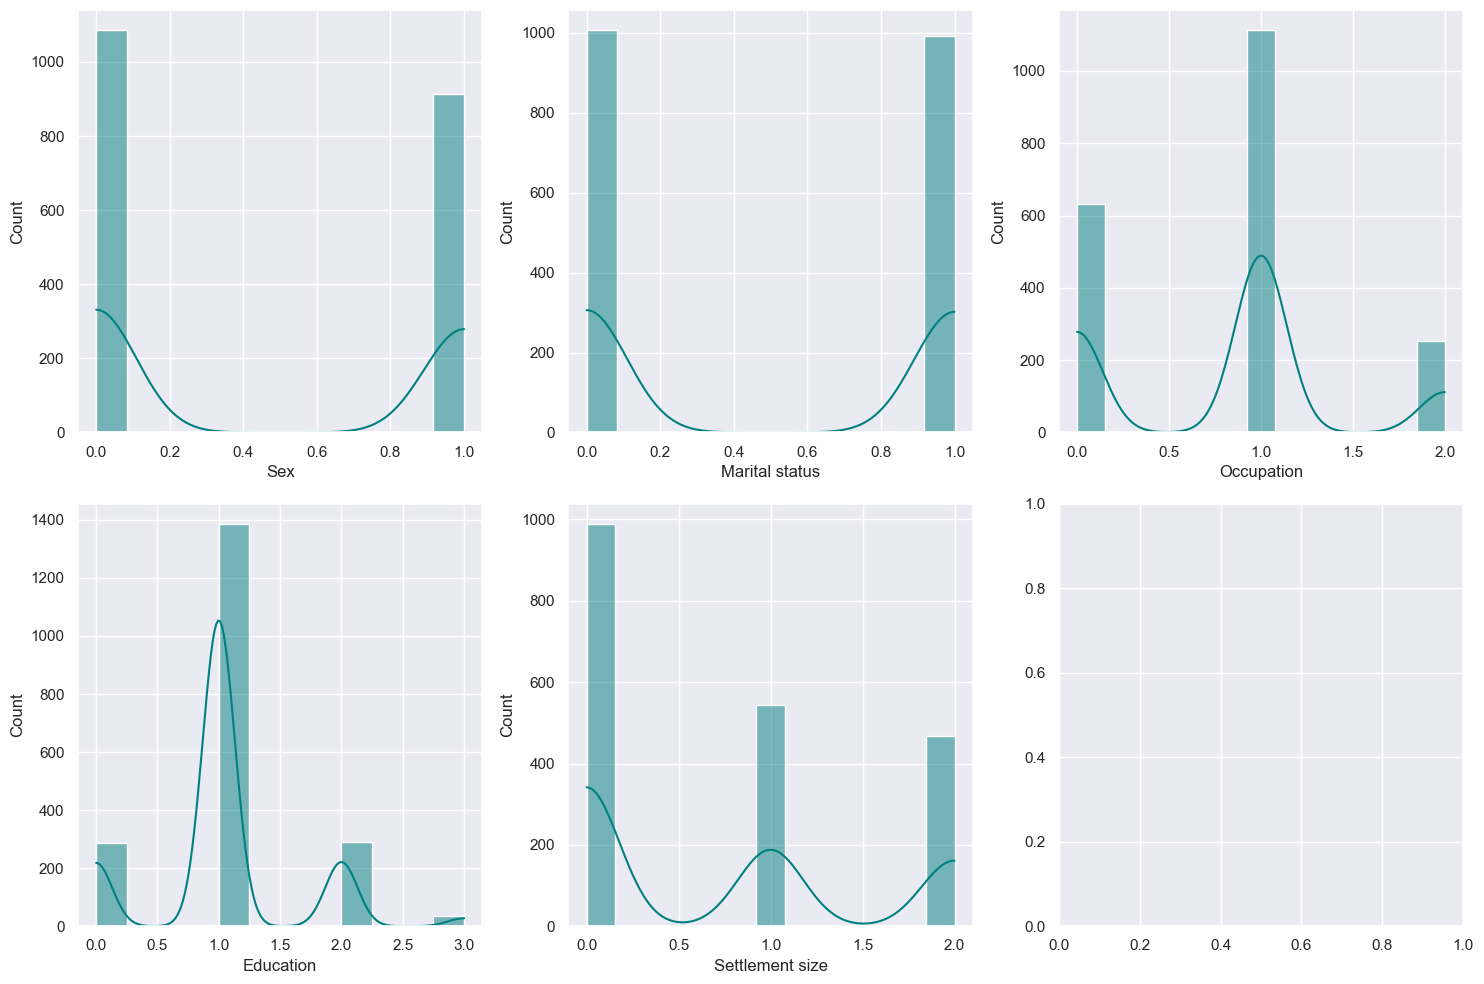

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Assuming df_new is your DataFrame

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

sns.histplot(data=df_new, x="Sex", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df_new, x="Marital status", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df_new, x="Occupation", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df_new, x="Education", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df_new, x="Settlement size", kde=True, color="teal", ax=axs[1, 1])

# If you want to add another histogram to the last subplot, use axs[1, 2]
# sns.histplot(data=df_new, x="Another Feature", kde=True, color="teal", ax=axs[1, 2])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


From the above histogram, it can be seen that:

- In the value distribution of Sex, there are more males ([Sex = 0] = 1086) than females ([Sex = 1] = 914) that have become loyal customers of the supermarket.

- Regarding, marital status, Single customers ([Status = 0] = 1007) figures are slightly higher than the non-single customer ([Status = 1] = 993). However, both different marriage statuses are quite similar and the supermarket can attract both of these different marriage statuses evenly. 

- Most customers in this data set are employed which occupied 68% ([Occupation=1 &Occupation=2]) while 663 customers are unemployment.

- For education, the majority of supermarket customers who have their highest education completion are Highschool ([Education = 1] = 1386) which occupies 69% of this data set of customers.


## Numerical Variable

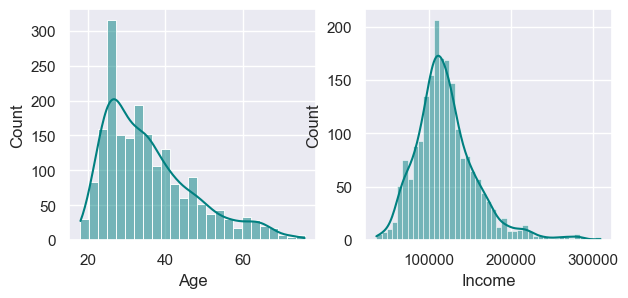

In [16]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=df_new, x="Age", kde=True, color="teal", ax=axs[0])
sns.histplot(data=df_new, x="Income", kde=True, color="teal", ax=axs[1])

plt.show()

- There data set have a biggest customers group range from the age of 20 to 40.

- For income, the average income of customers who come to the supermarket is 120,954. But a large majority of supermarket customers’ income is around 100,000. 

- The settlement size of  average customers of the market are from a small city ([Settlement size = 0] = 989) and  the second largest group in this category is customers from a midsized city ([Settlement size = 1] = 544).


<Axes: xlabel='Age', ylabel='Income'>

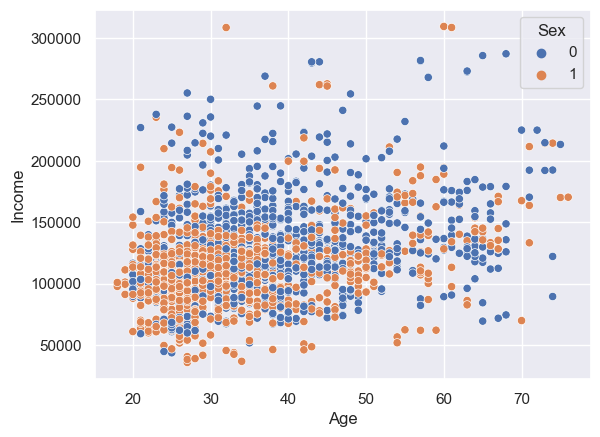

In [4]:
sns.scatterplot(x="Age", y="Income", data=df_new, hue="Sex")

From the scatter plot, the male group who is the majority of customers for the supermarket has a higher income. Also, there are a large group of females that has income from 50000-150000 and their age range from 20-40

# Customer Segmentation by Clustering

## Elbow Method

Before applying the clustering algorithm, it is important to use the elbow method to find the optimal number of clusters. 

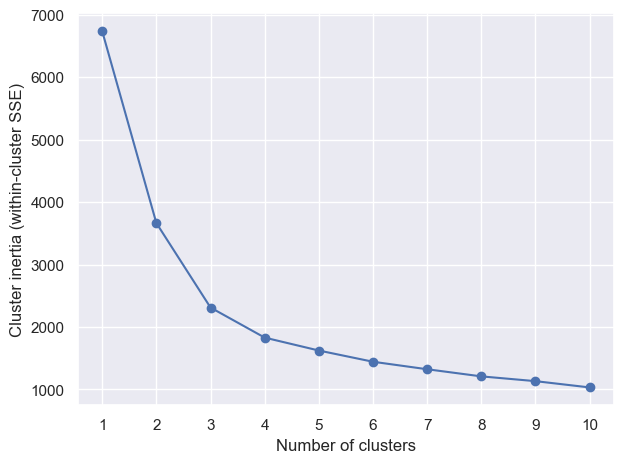

In [28]:
#Apply Elbow method to find the best number of clusters
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing

# Normalize Age and Income 
scaler = preprocessing.MinMaxScaler()
df_new[['Income','Age']] = scaler.fit_transform(df_new[['Income','Age']])
#X = df.drop(['ID'], axis=1).to_numpy()

inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_new)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

#headers = list(df_new.columns.values)

In the plot between inertia and the number of clusters (K), the line graph from 1 to 4 clusters provides a large improvement, and after 4 clusters the improvement stop reducing rapidly. 

Therefore, the suitable cluster for this data set is 4 which means there will be different customer segments.

## Kmeans Clustering 

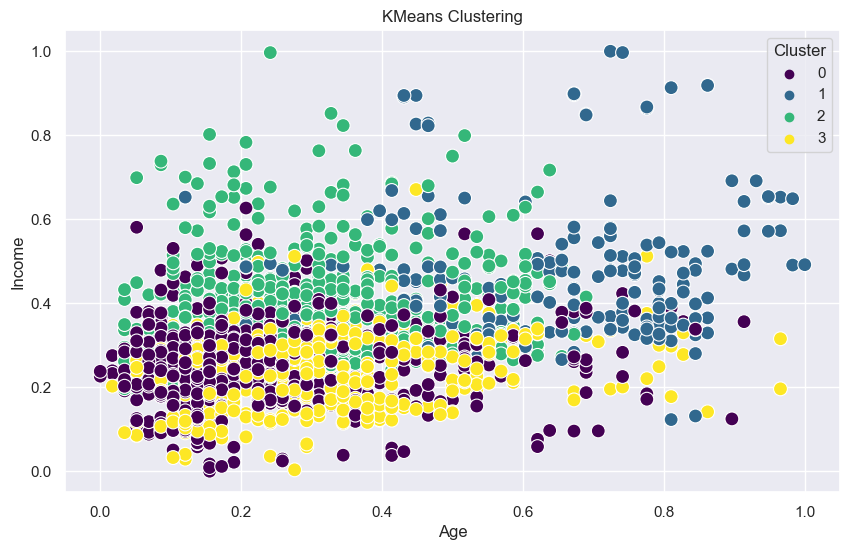

In [27]:
# Convert df from dataframe to Numpy array
X = df_new.to_numpy()

#Fit the data set in to Kmeans with 4 clusters
km = KMeans(n_clusters=4, 
            init='random',  # use standard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

# Fit the model and predict cluster labels
labels = km.fit_predict(X)

# Add cluster labels to the DataFrame
df_new['Cluster'] = labels

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Income", hue="Cluster", data=df_new, palette="viridis", s=100)
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


In [23]:
# Groups of Customer Segmentation
km.fit(X)

y_km = km.predict(X)
# Add the predicted labels back to the original dataset
np.transpose(y_km)
df_kmeans = table
df_kmeans['Kmeans_segment'] = y_km
df_kmeans

# Details of the 4 average cluster centroids
Customer_mean = df_kmeans.groupby(['Kmeans_segment']).agg('mean')
Customer_mean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Kmeans_segment,,,,,,,
0,0.851852,0.976296,31.451852,1.160000,105234.745185,0.545185,0.207407
1,0.465686,0.691176,55.421569,2.151961,166121.205882,1.313725,1.397059
2,0.145015,0.291541,34.309668,0.771903,137800.120846,1.237160,1.564955
3,0.322440,0.000000,36.098039,0.747277,99701.479303,0.361656,0.037037


After selecting the cluster, the data set is normalized and cluster by K-means clustering. 

The unsupervised model have create 4 customers segments like in the table below:

- Segment 1: married female, young, high school, average income, small cities

- Segment 2: non-single male, middle-aged, highest degree is a university, high income, skilled employee, mid-sized city 

- Segment 3: single male young, skilled employee, above average, skilled employee, big city

- Segment 4: single male, young, skilled employee, university, income below average, small cities

## Hierarchical Clusters

The second cluster method used for this method is **Dendogram** clustering calculated with top-down method. 

After the tree was cut down to remain only 4 clusters with the average value displayed in the table below: 

C:\Users\Nguyen Thuy Anh\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


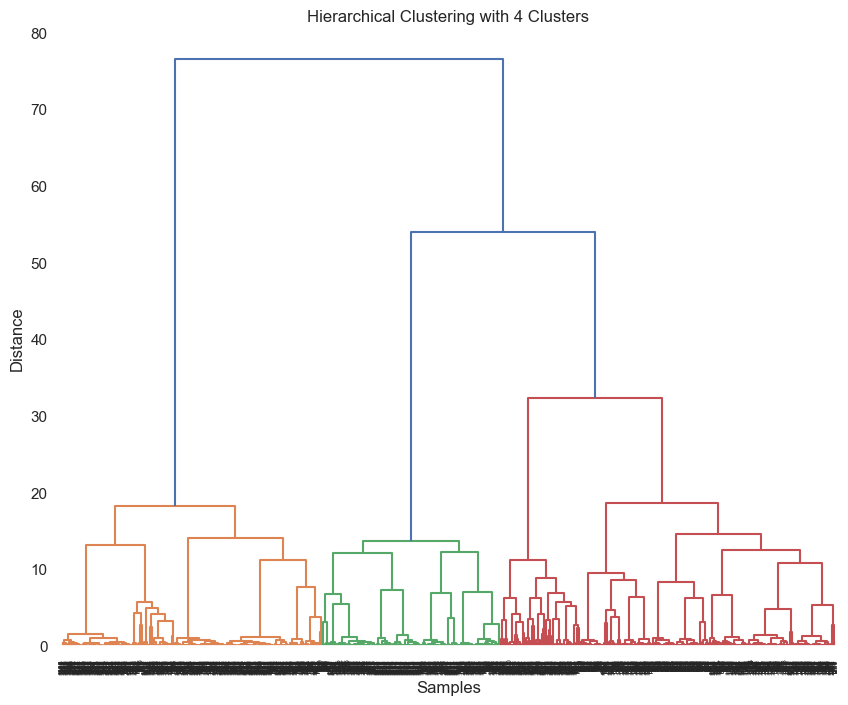

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kmeans_segment
label,,,,,,,,
0,0.465686,0.691176,55.421569,2.151961,166121.205882,1.313725,1.397059,1.0
1,0.145015,0.291541,34.309668,0.771903,137800.120846,1.237160,1.564955,2.0
2,0.322440,0.000000,36.098039,0.747277,99701.479303,0.361656,0.037037,3.0
3,0.851852,0.976296,31.451852,1.160000,105234.745185,0.545185,0.207407,0.0


In [24]:
#pip install gower
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

df_db = df_new
distance_matrix = pdist(df_db, metric='euclidean')

clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = clustering.fit_predict(X)

# Compute the linkage matrix
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')

plt.figure(figsize=(10, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering with 4 Clusters')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cut the tree to only 4 clusters
df_db_final = table
labels = cut_tree(linkage_matrix, n_clusters=4)
df_db_final['label'] = labels 

# Find the average value of 4 clusters:
Customer_mean_tree = df_db_final.groupby(['label']).agg('mean')
Customer_mean_tree

- Segment 1: married male, middle-aged, highly qualified employee, High income, a midsized city
- Segment 2: single male, young, university, high income, skilled employee, big city 
- Segment 3: non-single female, young, university education, skilled employee, average salary, unknown work experience, a small city
- Segment 4: single male, young, University, skilled employee, income above average income, a midsized city

# Conclusion

From both of the results, it can be seen that the hierarchical clustering has different results from the two different clusters, which provide 4 clearly different types of customers than Kmeans. These two cluster methods both calculate the distance of the different data points but the calculation method for both of them are different. For K means they calculate the distance of each data point with the centroids, while the hierarchical cluster method that is been used for this data set is Divisive (top down approach) which starts from 1 cluster and then splits the cluster into smaller clusters. When comparing the clusters identified by the two techniques, there are many differences.

From the 4 customers segment above, there are 2 recommendations for the supermarket based on the customer’s characteristics. Firstly, the supermarket should diversify the number of products for males because they occupied a large number in the loyal customers group. In detail, these newly added products can also have a higher price range because they make customers that the supermarket has been average to high-income customers. Besides that, they also have non-single female customers who have average incomes. The supermarket can focus on essential products and try to make weekly promotions for these items in order to encourage their consumption of mandatory regular used products.

In summary, this report has implemented 2 methods of clustering which are K means clustering and hierarchical clustering in order to create 4 different customer segments. Based on the different calculation methods of the 2 models on the backend, the results for the customer segment are slightly different. From the result of the customer segment, there are 2 recommendations for the supermarket to help the business retain their customers and encourage more consumption from the customers.
